In [2]:
!pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import FileLink

In [26]:
# Step 2: Load the Datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [27]:
# Step 3: Overview of Datasets
# Customers Dataset Overview
print("Customers Dataset Info:")
display(customers.info())
print("\nCustomers Dataset Head:")
display(customers.head())
print("\nCustomers Dataset Shape:")
display(customers.shape)

# Products Dataset Overview
print("\nProducts Dataset Info:")
display(products.info())
print("\nProducts Dataset Head:")
display(products.head())
print("\nProducts Dataset Shape:")
display(products.shape)

# Transactions Dataset Overview
print("\nTransactions Dataset Info:")
display(transactions.info())
print("\nTransactions Dataset Head:")
display(transactions.head())
print("\nTransactions Dataset Shape:")
display(transactions.shape)

Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


None


Customers Dataset Head:


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15



Customers Dataset Shape:


(200, 4)


Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


None


Products Dataset Head:


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31



Products Dataset Shape:


(100, 4)


Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


None


Transactions Dataset Head:


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68



Transactions Dataset Shape:


(1000, 7)

In [28]:
# Step 4: Handle Missing and Duplicate Values
# Customers
print("\nMissing Values in Customers:")
display(customers.isnull().sum())
print(f"\nNumber of duplicate rows in Customers: {customers.duplicated().sum()}")

# Products
print("\nMissing Values in Products:")
display(products.isnull().sum())
print(f"\nNumber of duplicate rows in Products: {products.duplicated().sum()}")

# Transactions
print("\nMissing Values in Transactions:")
display(transactions.isnull().sum())
print(f"\nNumber of duplicate rows in Transactions: {transactions.duplicated().sum()}")



Missing Values in Customers:


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


Number of duplicate rows in Customers: 0

Missing Values in Products:


ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


Number of duplicate rows in Products: 0

Missing Values in Transactions:


TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


Number of duplicate rows in Transactions: 0



Unique Regions in Customers:


Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64

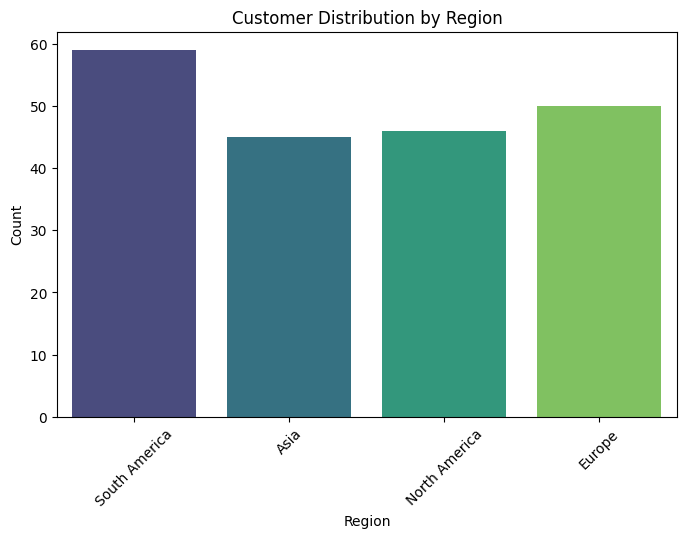

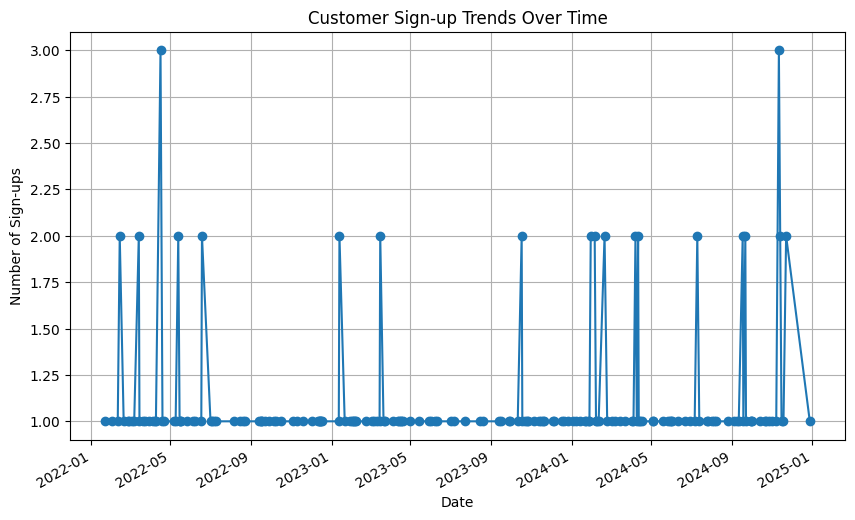

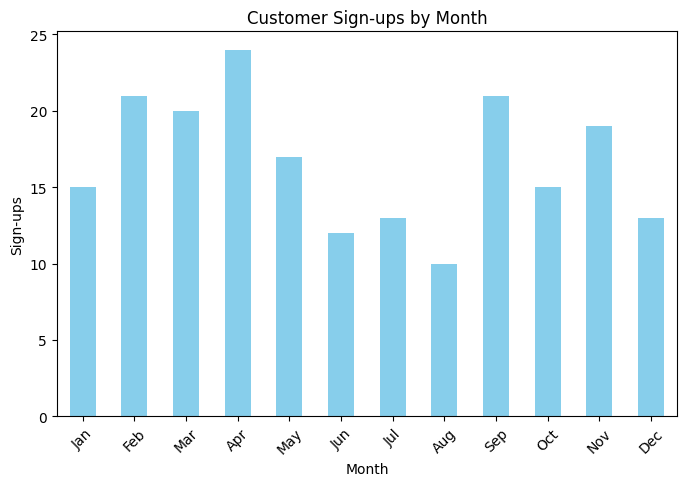


Unique Categories in Products:


Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64

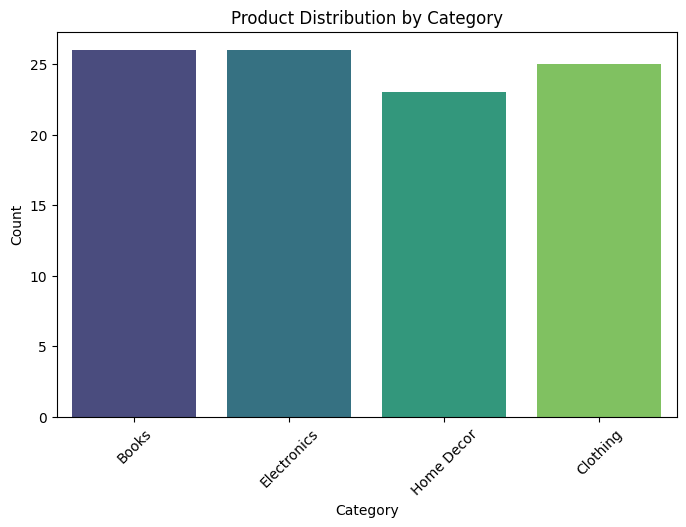

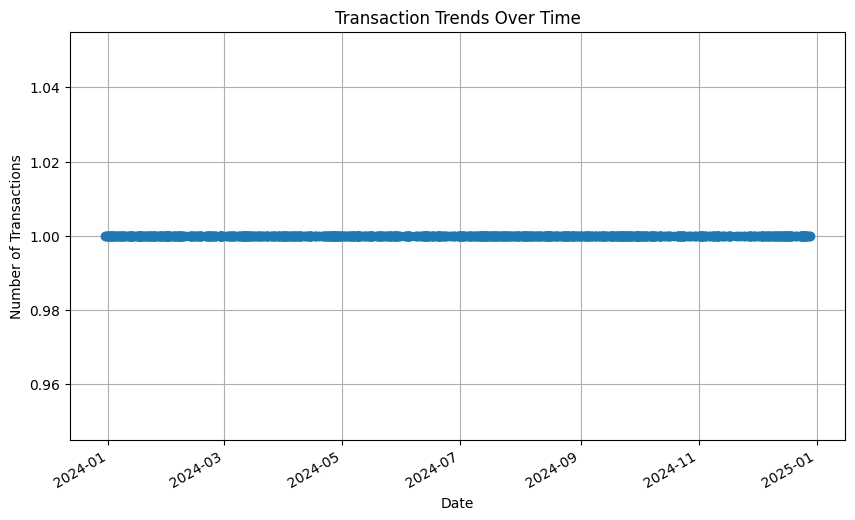

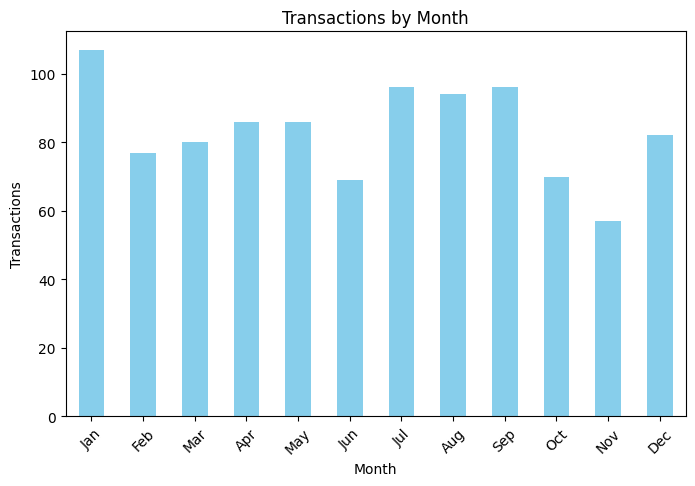

In [29]:
# Step 5: Data Cleaning
# Convert 'SignupDate' and 'TransactionDate' to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Step 6: Exploratory Data Analysis
# Customers Analysis
# Unique Regions
print("\nUnique Regions in Customers:")
display(customers['Region'].value_counts())

# Visualization: Customer Distribution by Region
plt.figure(figsize=(8, 5))
sns.countplot(data=customers, x='Region', hue='Region', palette='viridis', legend=False)
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Visualization: Customer Sign-up Trends Over Time
plt.figure(figsize=(10, 6))
customers['SignupDate'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Customer Sign-up Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Sign-ups')
plt.grid()
plt.show()

# Monthly Sign-ups
customers['Month'] = customers['SignupDate'].dt.month
monthly_signups = customers.groupby('Month').size()
plt.figure(figsize=(8, 5))
monthly_signups.plot(kind='bar', color='skyblue')
plt.title('Customer Sign-ups by Month')
plt.xlabel('Month')
plt.ylabel('Sign-ups')
plt.xticks(range(12), 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

# Products Analysis
# Unique Categories
print("\nUnique Categories in Products:")
display(products['Category'].value_counts())

# Visualization: Product Distribution by Category
plt.figure(figsize=(8, 5))
sns.countplot(data=products, x='Category', hue='Category', palette='viridis', legend=False)
plt.title('Product Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Transactions Analysis
# Transactions Trends Over Time
plt.figure(figsize=(10, 6))
transactions['TransactionDate'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Transaction Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid()
plt.show()

# Monthly Transactions
transactions['Month'] = transactions['TransactionDate'].dt.month
monthly_transactions = transactions.groupby('Month').size()
plt.figure(figsize=(8, 5))
monthly_transactions.plot(kind='bar', color='skyblue')
plt.title('Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Transactions')
plt.xticks(range(12),
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()


In [30]:
# Step 7: Insights
# Most Frequent Region in Customers
most_frequent_region = customers['Region'].mode()[0]
print(f"\nMost frequent region in Customers: {most_frequent_region}")

# Most Frequent Category in Products
most_frequent_category = products['Category'].mode()[0]
print(f"\nMost frequent category in Products: {most_frequent_category}")

# Transactions Per Year
transactions['Year'] = transactions['TransactionDate'].dt.year
transactions_per_year = transactions['Year'].value_counts()
print("\nTransactions per year:")
display(transactions_per_year)



Most frequent region in Customers: South America

Most frequent category in Products: Books

Transactions per year:


Year
2024    996
2023      4
Name: count, dtype: int64

In [32]:
# Save the cleaned datasets as CSV files in the current directory
customers.to_csv('Customers.csv', index=False)
products.to_csv('Products.csv', index=False)
transactions.to_csv('Transactions.csv', index=False)

print("\nFiles saved successfully:")
print(" - Cleaned_Customers.csv")
print(" - Cleaned_Products.csv")
print(" - Cleaned_Transactions.csv")



Files saved successfully:
 - Cleaned_Customers.csv
 - Cleaned_Products.csv
 - Cleaned_Transactions.csv
